# BMI 826 / CS 838: Homework Assignment 1

This project will be done using iPython notebooks. These are convenient ways for you to quickly and easily interact with the code. A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).

If there are any notes you wish to leave for the TAs as they test your code, you may leave them here.

## Setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


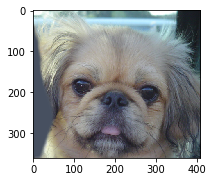

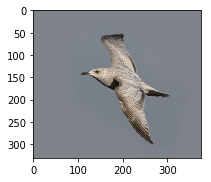

In [573]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import load_image, save_image
from student_code import Compose, Scale, RandomHorizontalFlip, RandomColor, RandomRotate, RandomSizedCrop
%load_ext autoreload
%autoreload 2

image1 = load_image('../data/dog.bmp')
image2 = load_image('../data/bird.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow(image1);
plt.figure(figsize=(3,3)); plt.imshow(image2);


## Create Image Transforms

In [574]:
# create an empty list and add transforms one by one
transforms = []
transforms.append(Scale(320))
transforms.append(RandomHorizontalFlip())
transforms.append(RandomColor(0.15))
transforms.append(RandomRotate(30))
transforms.append(RandomSizedCrop(224))
comp_transforms = Compose(transforms)
print(comp_transforms)


Scale [Exact Size (320, 320)]
Random Horizontal Flip
Random Color [Range 0.85 - 1.15%]
Random Rotation [Range -30.00 - 30.00 Degree]
Random Crop[Size (224, 224); Area 0.25 - 1.00%; Ratio 0.80 - 1.20%]



## Apply Transforms to Images
All functions you need to implement in this project can be found in student_code.py. You will need to fill in the missing code pieces in the Scale, RandomSizedCrop, RandomRotate and RandomColor.

almost done


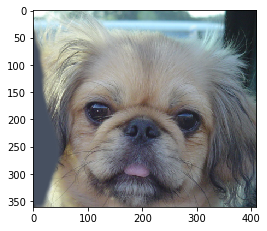

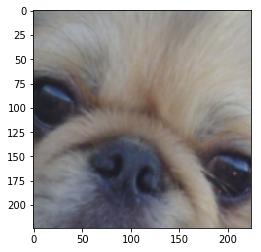

In [602]:
transformed_image1 = comp_transforms(image1)

# let's take a look at the results!
plt.figure(figsize=(4,4)); plt.imshow(image1);
plt.figure(figsize=(4,4)); plt.imshow(transformed_image1);


## Create More Results

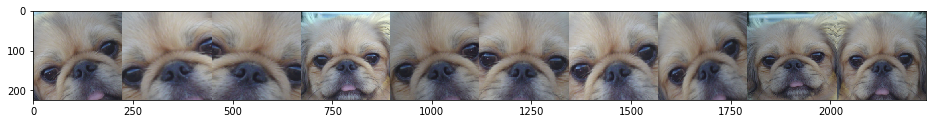

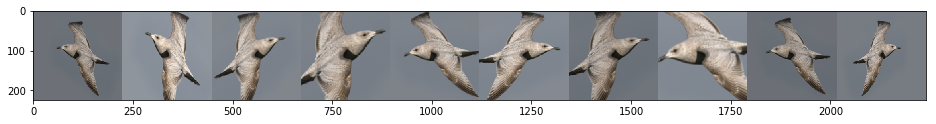

In [604]:
vis_img_list = []
for img in [image1, image2]:
    img_list = []
    for idx in range(10):
        img_list.append(comp_transforms(img))
    vis_img = np.concatenate(img_list, axis=1)
    vis_img_list.append(vis_img)

for vis_img in vis_img_list:
    plt.figure(figsize=(16,16)); plt.imshow(vis_img);

## Save Results

In [605]:
for file_idx, vis_img in zip(range(len(vis_img_list)), vis_img_list):
    save_image('../results/outputs_{:d}.jpg'.format(file_idx), vis_img)